In [44]:
import numpy as np
from math import log,e
import matplotlib.pyplot as plt

In [45]:
def gradient_descent(w:np.array,lr:float,X:np.array,Y:np.array,max_steps:int,cost_func,grad_decr,predictY):
    """
    w : coeffs. inputs w are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    Ɛ ~= 0 (some small value close to 0)

    returns : a,b
    """
    costs = []
    Ɛ = 10**-6
    cost = None
    for step in range(max_steps):
        w_prev = w.copy()
        
        Y_pred = predictY(w,X)
        decr_w = grad_decr(w,X,Y_pred)

        w= w_prev - lr*decr_w

        cost = cost_func(w,X,Y_pred)
        costs.append(cost)
        print(cost)
        if (cost)**2 < Ɛ: #  (a_prev -a)**2 + (b_prev-b)**2 
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return w

In [51]:
def sigmoid(t: float):
    return 1 / (1 + e ** (-t))

def prob(w: np.array, x: np.array, y: float):
    return sigmoid(y * np.dot(w, x))

def _logistic_cost_func(w: np.array, X: np.array, Y: np.array):
    return -sum([log(prob(w, X[i], Y[i])) for i in range(len(Y))])

def _logistic_grad_decr(w: np.array, X: np.array, Y: np.array):
    return np.sum(np.array([Y[i] * X[i] * prob(w, X[i], -Y[i]) for i in range(len(Y))]))

In [52]:
class BinaryLogisticRegression():

    def fit(self,X,Y,init_w=None,lr=0.05,max_steps=500,cost_func=_logistic_cost_func,grad_decr=_logistic_grad_decr):
        if init_w == None:
            init_w = np.zeros(len(X[0]))
        
        self.w = gradient_descent(w=init_w,lr=lr,X=X,Y=Y,max_steps=max_steps,cost_func=cost_func,grad_decr=grad_decr,predictY=self.predictY)

    def predict(self,x:np.array):
        # input: 1 x vector
        return sigmoid(np.dot(self.w,x))
    
    def predictY(self,w:np.array,X:np.array):
        #
        # same thing as predict() but for an array of x vectors, instead of a one x vector
        return [sigmoid(np.dot(w,X[i])) for i in range(len(X))]

    def score(self,X,Y):
        return _logistic_cost_func(self.w, X, Y)

8.371309289210865
8.5844091771074
8.438556129452536
8.30473901997825
8.202991679215163
8.124295254660252
8.06148589665092
8.009957486873686
7.966726278251338
7.9297910192951475
7.897760512396769
7.8696362520434375
7.844681526800228
7.822339735431465
7.802181663973178
7.783870402136731
7.767137355616213
7.751765445728598
7.737577088810907
7.724425430175359
7.712187841539707
7.700761022950451
7.690057261823597
7.680001539597816
7.670529268166755
7.661584500353548
7.653118501474495
7.6450885989806086
7.637457248423766
7.6301912692887095
7.623261215372363
7.616640852599417
7.6103067232746
7.604237780368152
7.59841507891961
7.5928215143162205
7.587441599264234
7.582261272875304
7.577267736547065
7.572449312308314
7.5677953200865336
7.5632959709843455
7.558942274156777
7.5547259552895385
7.550639385010012
7.546675515833358
7.542827826468068
7.539090272488136
7.535457242530317
7.531923519300649
7.528484244779195
7.525134889099844
7.52187122265566
7.518689291042548
7.515585392506588
7.51255605

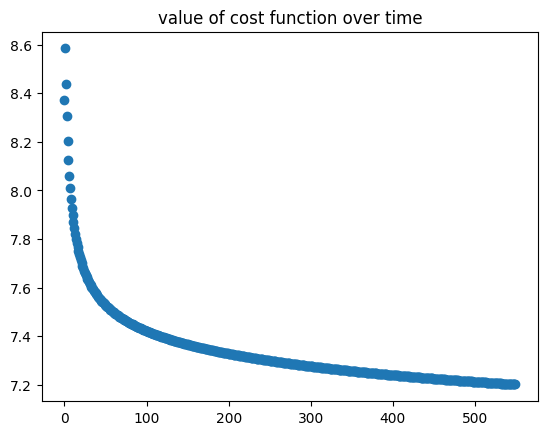

In [60]:
clf = BinaryLogisticRegression()
X = np.array(
    [np.array([x_i]) for x_i in np.array([1, +1, +2, +3, +4, +5, +6, +7, +8, +9])]
)
Y = np.array([0, 0, 0, 0, 0, +1, +1, +1, +1, +1])
clf.fit(X, Y, lr=0.01, max_steps=550)

In [59]:
1 if clf.predict([8]) > 0.5 else 0

0